In [2]:
import matplotlib.pyplot as py
import pandas as pd
import numpy as np

In [15]:
data = {'Age':[20,20,35,45,45,75,45,65], 'Height':[50,102,162,162,180,180,250,400]}
df = pd.DataFrame(data)
df

,Age,Height
0,20,50
1,20,102
2,35,162
3,45,162
4,45,180
5,75,180
6,45,250
7,65,400


In [16]:
Age = np.array(df['Age'])
Height = np.array(df['Height'])

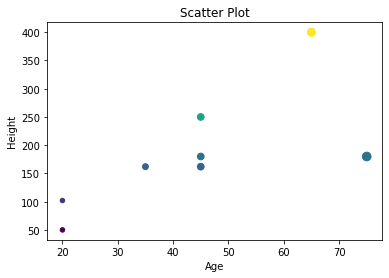

In [4]:
#Scatter Plot
py.scatter(Age, Height, c=Height, s=Age)
py.title('Scatter Plot')
py.xlabel('Age')
py.ylabel('Height')
py.show()

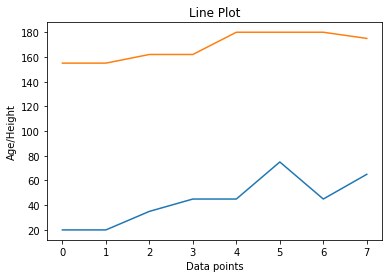

In [42]:
#Line Plot
py.plot(Age)
py.plot(Height)
py.title('Line Plot')
py.xlabel('Data points')
py.ylabel('Age/Height')
py.show()

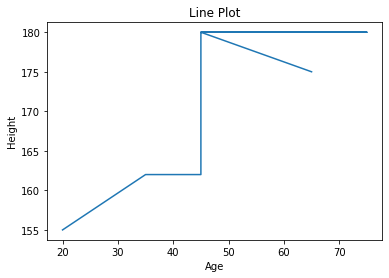

In [38]:
#Line Plot
py.plot(Age, Height)
py.title('Line Plot')
py.xlabel('Age')
py.ylabel('Height')
py.show()

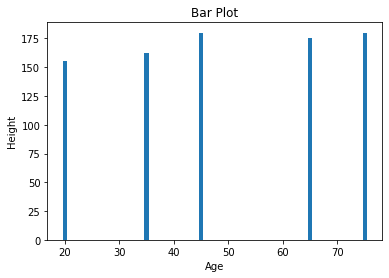

In [41]:
#Bar Plot
py.bar(Age, Height)
py.title('Bar Plot')
py.xlabel('Age')
py.ylabel('Height')
py.show()

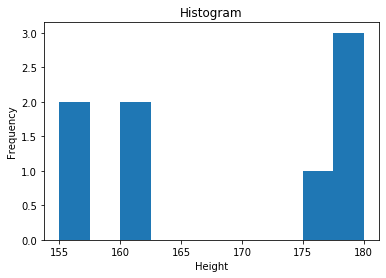

In [44]:
#Histogram
py.hist(Height)
py.title('Histogram')
py.xlabel('Height')
py.ylabel('Frequency')
py.show()

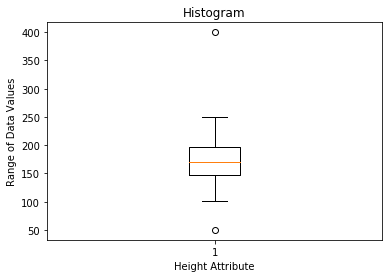

In [63]:
#Box-plot
py.boxplot(Height)
py.title('Histogram')
py.xlabel('Height Attribute')
py.ylabel('Range of Data Values')
py.show()

In [3]:
# create data 
df = pd.DataFrame([ 
                   [45,12000,250,750,5000,1],  
                   [34,8000,150,680,2000,0],  
                   [28,15000,300,720,3000,1],  
                   [50,7000,100,600,1000,0],
                    [40,10000,200,710,4000,1]],  
    
                   columns=['Age', 'Account Balance', 
                            'Transactions', 'Credit Score', 'Loan Amount','High Value Customer']) 

  
# view data 
display(df)

,Age,Account Balance,Transactions,Credit Score,Loan Amount,High Value Customer
0,45,12000,250,750,5000,1
1,34,8000,150,680,2000,0
2,28,15000,300,720,3000,1
3,50,7000,100,600,1000,0
4,40,10000,200,710,4000,1


                          Age  Account Balance  Transactions  Credit Score  \
Age                  1.000000        -0.597672     -0.599307     -0.448920   
Account Balance     -0.597672         1.000000      0.985329      0.757395   
Transactions        -0.599307         0.985329      1.000000      0.857152   
Credit Score        -0.448920         0.757395      0.857152      1.000000   
Loan Amount         -0.072643         0.591198      0.700000      0.912452   
High Value Customer -0.272614         0.824876      0.866025      0.830116   

                     Loan Amount  High Value Customer  
Age                    -0.072643            -0.272614  
Account Balance         0.591198             0.824876  
Transactions            0.700000             0.866025  
Credit Score            0.912452             0.830116  
Loan Amount             1.000000             0.866025  
High Value Customer     0.866025             1.000000  


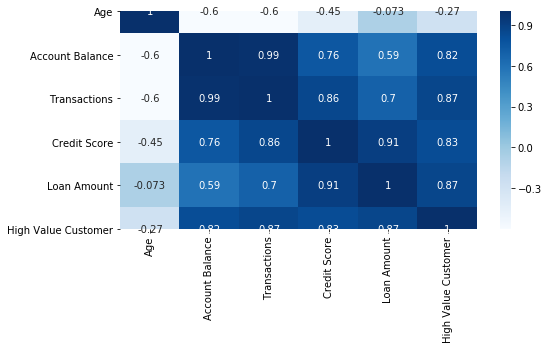

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(8, 4))
cor_matrix = df.corr()
sns.heatmap(cor_matrix, annot=True, cmap=plt.cm.Blues)

print(cor_matrix)
plt.show()

In [7]:
#Correlation with output variable
cor_target = abs(cor_matrix["High Value Customer"])
print(cor_target)
relevant_features = cor_target[cor_target>0.83]
print(relevant_features)

Age                    0.272614
Account Balance        0.824876
Transactions           0.866025
Credit Score           0.830116
Loan Amount            0.866025
High Value Customer    1.000000
Name: High Value Customer, dtype: float64
Transactions           0.866025
Credit Score           0.830116
Loan Amount            0.866025
High Value Customer    1.000000
Name: High Value Customer, dtype: float64


In [8]:
print(df[["Transactions","Credit Score"]].corr())

              Transactions  Credit Score
Transactions      1.000000      0.857152
Credit Score      0.857152      1.000000


In [ ]:
print(df[["Transactions","Loan Amount"]].corr())

In [ ]:
print(df[["Loan Amount","Credit Score"]].corr())

In [11]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

x = df.iloc[ : , : -1]
y = df.iloc[:,5]
print(x.head)
print(y.head)


# Specify the model (e.g., Decision Tree Classifier)
model = DecisionTreeClassifier()

# Initialize RFE
rfe = RFE(model, n_features_to_select=3)  # Select top 3 features

# Fit RFE
fit=rfe.fit(x, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


<bound method NDFrame.head of    Age  Account Balance  Transactions  Credit Score  Loan Amount
0   45            12000           250           750         5000
1   34             8000           150           680         2000
2   28            15000           300           720         3000
3   50             7000           100           600         1000
4   40            10000           200           710         4000>
<bound method NDFrame.head of 0    1
1    0
2    1
3    0
4    1
Name: High Value Customer, dtype: int64>
Num Features: 3
Selected Features: [False False  True  True  True]
Feature Ranking: [3 2 1 1 1]
